In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation

In [2]:
from PSO_algo import Particle
from PSO_algo import PSO

In [3]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()
strain_number = len(Mozambique.strain) #=45
Mozambique_strain = np.array(Mozambique.strain)
Mozambique_cases = np.array(Mozambique.cases)

#mu value of Mozambique
mu = 6

#import Brazil alpha & data
Brazil_alpha = np.loadtxt(open("Brazil_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Brazil_strain = np.array(Brazil.strain)

#import Denmark alpha & data
Denmark_alpha = np.loadtxt(open("Denmark_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Denmark_strain = np.array(Denmark.strain)

In [4]:
# initiate matrix Mozambique_alpha
Mozambique_alpha = np.ones((strain_number, strain_number))*50

for xM, strain_xM in enumerate(Mozambique_strain):
    for yM, strain_yM in enumerate(Mozambique_strain):
        #insert from Brazil
        find_xBrazil = np.where(Brazil_strain == strain_xM)
        index_xBrazil = find_xBrazil[0]

        find_yBrazil = np.where(Brazil_strain == strain_yM)
        index_yBrazil = find_yBrazil[0]

        #insert from Denmark
        find_xDenmark = np.where(Denmark_strain == strain_xM)
        index_xDenmark = find_xDenmark[0]

        find_yDenmark = np.where(Denmark_strain == strain_yM)
        index_yDenmark = find_yDenmark[0]


        if index_xBrazil.size > 0 and index_yBrazil.size > 0:
            Mozambique_alpha[xM, yM] = Brazil_alpha[index_xBrazil, index_yBrazil]
        elif index_xDenmark.size > 0 and index_yDenmark.size > 0:
            Mozambique_alpha[xM, yM] = Denmark_alpha[index_xDenmark, index_yDenmark]

np.savetxt('fix_alpha_Mozambique.txt', Mozambique_alpha, delimiter = ',')

In [5]:
#find the length of vector that we need to fit the matrix Mozambique alpha
length = 0

for i in range(0, strain_number):
    for j in range(0, strain_number):
        if Mozambique_alpha[i,j] > 49:
            length += 1

print(length)
#so we need to fit the matrix Mozambique

1215


In [6]:
#find the coordinate of missing alpha_ij in Mozambique alpha_matrix
position = []

for i in range (0, strain_number):
    for j in range (0, strain_number):
        if Mozambique_alpha[i,j] > 49:
            position.append(np.array([i,j]))

In [7]:
#initial value
u0 = (1/strain_number)*np.ones(strain_number)

#cost function for PSO
def func(vector):
    # insert alpha vector to Mozambique_alpha
    alpha_matrix = np.loadtxt(open("fix_alpha_Mozambique.txt","rb"), delimiter = ",", skiprows = 0)
    for i in range (0, length):
        coordinate = position[i]
        alpha_matrix[coordinate[0], coordinate[1]] = vector[i]

    #compute invasion fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]

    #compute right-hand-side of replicator equations
    solution = Replicator(strain_number, lambd, 50, u0)
    err = np.linalg.norm(solution - Mozambique_cases)

    return err

In [8]:
# RUN PSO algo
# initial starting location [x1,x2...]
initial = [0]*length

#print(func(initial))
#time consuming: ~6.5 days

#start at 14:12
# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, length):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

PSO(func, initial, bounds, num_particles = 4000, maxiter = 4000)

FINAL:
[0.7012078706506457, 0.19870511586938425, 0.5928849222478227, -0.5692725762792963, 1.0046984185215393, 0.8780874526653187, -0.37011401707633357, -0.16283646966348858, -0.7755193554385281, -0.6958393511330334, -0.045276631149392926, -0.542134459442465, 0.10138506395000216, 0.19160244115076955, -0.02681666542360015, 0.0567159334808876, -0.49731395787553656, 1.517222622184981, -0.8896206029526205, -0.6546593666288221, -1.0375200457748341, -0.11090272365152642, -0.11826771124940169, 0.04038938398584248, -0.44277089275613507, 0.251330202491487, -1.0343665590697226, -0.361266916287716, 1.7080538715777291, -0.017011874523521178, 0.143040797966176, 0.46093493037894345, -0.9204098280903836, 0.09612344322678061, 0.8121257768438903, -1.0608813199319456, 0.32183892180298684, 0.3829981336033712, -0.3044269778025647, 1.8063172067537152, -0.8856358088560924, -0.5158438163250051, -0.096062132868144, -1.1224524284221913, 0.5950993153581807, 0.7141740113798122, 0.5140570185337293, -0.104733179230

In [9]:
opti_Mozambique = [0.7012078706506457, 0.19870511586938425, 0.5928849222478227, -0.5692725762792963, 1.0046984185215393, 0.8780874526653187, -0.37011401707633357, -0.16283646966348858, -0.7755193554385281, -0.6958393511330334, -0.045276631149392926, -0.542134459442465, 0.10138506395000216, 0.19160244115076955, -0.02681666542360015, 0.0567159334808876, -0.49731395787553656, 1.517222622184981, -0.8896206029526205, -0.6546593666288221, -1.0375200457748341, -0.11090272365152642, -0.11826771124940169, 0.04038938398584248, -0.44277089275613507, 0.251330202491487, -1.0343665590697226, -0.361266916287716, 1.7080538715777291, -0.017011874523521178, 0.143040797966176, 0.46093493037894345, -0.9204098280903836, 0.09612344322678061, 0.8121257768438903, -1.0608813199319456, 0.32183892180298684, 0.3829981336033712, -0.3044269778025647, 1.8063172067537152, -0.8856358088560924, -0.5158438163250051, -0.096062132868144, -1.1224524284221913, 0.5950993153581807, 0.7141740113798122, 0.5140570185337293, -0.1047331792302543, -0.03944285296427866, -0.7120985788301405, -0.41241903828878507, 0.16440785133678087, -0.17323227446839476, -0.6013978995072049, 1.6222626157346813, -0.08860962017974543, -2.195948562482341, 0.9680735074267797, -0.36917365501969235, 0.7921421697785336, -0.21986418374490346, 0.1036256327973858, -0.03224937902999818, -0.221844918801113, 0.3076222505604822, -0.71352052173824, 0.07341738763119926, 0.10697093478163508, -0.6964678390743068, 0.5111889415902348, -0.20366972648098314, 0.04923503402689022, -0.13674408531510118, -0.7780971328165706, 0.6898755050138126, -0.3100658179398802, -0.04780736067520397, 0.19594564768763978, -0.1780776856763262, 0.25940557730140673, 0.25594801297912095, -1.050622560769456, -0.06680381507090027, -0.4746204236249259, 0.3006590419751314, 0.5380229208195019, -0.7798684054433176, 0.3194723032156109, 0.47009745151756543, 0.5599415420527691, -0.29712703696972936, 0.0774667644618036, 0.21355089616058978, 1.7680391532182453, 0.39378006957761474, -0.6918139841096186, -0.7494325234461423, -1.0107559527387715, 1.6057860826632568, 0.01869890530931217, 1.3974462471838618, 0.5529273642504627, -1.0291688917299506, -0.5497247823134338, 0.6695580455354161, -0.9173603828080825, -0.13054637000298225, -0.1794280776366431, 0.4685538555174502, -0.39846368970955776, -0.7022311908334576, 0.34076606130744147, 1.4872591256531156, -1.820686786384599, -0.2435834454539104, 0.21699906138844718, -0.16096054508067054, -0.08469860111889305, -2.464286550287195, -0.7341755296678246, 0.41234356376718484, -1.1865903558750976, 0.15301127090567188, 0.23533575747491867, -2.8759169097782573, -0.21992068209325638, -2.6666176326966267, -0.33363655420616256, -0.6338241159886396, -0.3239183222469829, 0.35774127620302115, 0.14794432861057183, 0.23745507809798783, 1.355423486902508, 1.9598947840574688, -1.1039830045367796, 0.4871766433372495, -0.6095286250725219, 0.06961594904507735, 1.143585016018338, 1.144869082793223, 0.16342911925897305, 0.664695258024444, -0.3800832875290964, -0.908503260247993, 0.36808029086935345, 0.8460601188689552, 0.2735507145739211, -0.7803396071533532, -0.3975600904727615, -0.5993738624607451, 0.376123257400164, -1.184000486032035, 0.16208509054268685, -0.40781381194936295, -0.9863534140793552, 0.9479170298086891, -1.0600708287386273, 0.2075958301404473, 0.8588761667788181, 0.7843052299871114, 0.8295383212078966, 2.821125248031561, 0.6621154463208975, -0.49755107509214785, -1.1747607315633344, -0.6148529254555571, -0.08705948929400122, 0.4370586228156748, -0.21619092361992942, 0.6397843177465116, 2.222816087519213, -0.9360235853688407, -0.3580831987620636, -1.1668152113756554, 0.9337109020926598, 0.18383750917263766, -0.7889864482951616, -0.39909190772648906, 0.551131372996761, -1.177176784578771, -0.6388939002266002, 0.06560204509993926, -2.1924367384761956, 0.15982766866399215, -0.9012336148657972, 0.004922157844762677, 0.8135608059244577, 2.1274857687493, -0.25380896236577455, -0.18051303660337975, 0.1904628145651586, 0.055993197251658924, 0.7210790724427119, 0.7039519733875168, -0.29689991126549503, -0.9448513195317351, 0.33651250930417226, 0.5951372983524901, 0.17215742714774673, 0.5779057758484378, 0.13338056480808969, 0.4909661535382533, 0.30503380881048897, 0.5271958040363265, 0.1761377095545923, -0.5123690331964759, -0.7769005818320901, 0.033360590885232265, -1.4272397577965983, 1.1154065412095684, 0.6344592311182828, 0.3111431430498108, -1.0647162150064995, 0.29721911088161596, 0.5204964135475093, 0.33340991686274013, 0.12709549486871727, 0.6199373248999832, -1.012088916927191, -0.0009332801435573421, -0.6719843860239626, 0.5873288286900131, 0.12732953972316594, 0.22993527581418072, 0.6649699729069504, -1.3320609187785484, -0.27307421354646944, -1.0330748737610362, -0.5511870258609263, 0.7163515989516526, -2.0016354802105445, -1.0319746312956593, -1.8178418385646427, 0.9479580867097532, -0.771749916934673, 0.5935402413505259, 1.314422138330043, 0.19482397128981424, -0.5165883497031365, -0.3824060199846972, -1.4891753302160864, 1.6940214459010148, 0.3125171985061136, 0.313185490711472, -0.034045543870671206, -0.3372799291099649, 0.6775102978170409, 1.5739060748377722, -0.30963770479232916, -0.22117743006081572, -0.8269889596856969, -0.40427441266641106, 0.23796179270875523, -0.539084651501155, 1.1024641072862538, -0.4022479676105126, -0.5985484952700265, -0.8543635819543818, -3.0453309167199656, 0.07628984312745275, 1.8948334743368462, -1.7446250881983212, 0.7636007592569591, 1.828366782222083, 0.6179306831247924, -0.5899332088263853, 0.46206168268034997, 0.8331600171797154, -0.03861079981386174, 0.5595369633493311, 0.1093315125777108, 0.4174735957808953, 0.711847067237846, -0.8355193994252355, 0.20583408750623394, 0.24621319468082695, 1.1107798837146114, 0.06921867030015932, -0.718330077474817, 0.2021932616169273, 0.4920998604373323, 0.07045122899632607, -1.5321208580171455, 0.20714366837841322, 1.0323637308308713, 0.45694915037650014, -0.44391771707169386, 0.2563223896601468, 0.40412677819663895, 0.6080389875987827, 0.7746695767351338, 0.6067011542125464, 0.5785895978851081, -0.4725521373849432, 0.8345115011069566, 0.3370276025445762, -0.37127014227643745, -0.45891728297387074, -0.5285109129458714, -0.5673631869796756, 0.550154747929601, -0.419952082743447, 0.53528484937306, -0.43793341216764947, 0.3986348939586778, 0.6776733602113357, -0.21499720290884836, -0.004612369942892413, 0.48250737621136963, -0.4157759761307125, 0.5418352375427368, 1.0555995041981756, 0.5650880845556935, 0.30409072760761535, 0.5027956490260741, -0.8057998324618896, 0.40834911093214005, 1.091353546496298, 0.9194444319773828, 0.6599746594538856, -0.6428458320782077, -0.6017255787794984, -0.3483208249429536, -0.2633446101945444, -0.06606416070274024, 0.26297252474932575, 0.5892596938318861, 1.150423387530869, -0.6506646073365834, -1.8516918369667377, 0.06861978667518884, -0.11486972049683884, -0.7346312041576691, 0.2336748728654258, 0.34998528841182436, 0.012331630764579384, -0.24369012010652266, -0.6185330530494952, 0.6037223599836947, -0.19099413406791782, -1.0249690184466682, 0.34666211818304105, 0.3520017827701878, -0.5634720153794188, -0.20972345721504854, 2.8451624151067456, -0.29246993219972395, -0.40195455333564234, 1.0629045862537898, -0.6178654929344376, -0.24840110019976355, -0.2752066227251815, 0.11756217229430314, 1.097826211858787, -0.24014497412917724, 1.679222235053993, -0.18349642685741416, 0.4413055788226623, 0.17125159096073084, -0.18930821637676304, 0.5739558593423958, -1.115527806044263, 0.23121383926066233, -0.06991313407263748, -0.45780128996917285, 0.5510599569623102, 0.5826582700200383, -0.6712145276253542, 0.24660612089718986, -1.6506359150268948, -1.989708283506902, 1.035268293367711, -0.26725753930661456, 1.0153737294325471, 0.4476969696514284, 0.5502103728207722, -0.2518180814985699, -0.5397960489715118, 0.6163428662426533, 0.8075666067032867, 0.9166443459777238, -0.06300733275291485, 0.5203103996538393, -0.5034810899757035, 0.022066696256175796, 0.5348026937970017, -0.14871363753679595, -0.06719978259529087, -0.4715607572106348, -0.29722281854638644, -0.2640466904064881, -0.7105899674486164, 0.46550700943943923, -0.8892568147354895, -0.3299627860447004, 0.017642910606518125, 0.488929909198499, 0.21669615499714867, 0.5099262485781796, -0.819704748789461, -0.3755053076150565, 0.655481917985295, 1.3021356681617569, -0.6158283290797967, 0.05602793355663592, -0.1891921762596895, 0.47543053884123304, 0.10920977688785416, -0.2380844324670511, 1.0435767018091464, 1.4670371606270987, 0.8199124457448804, -0.42048686473174685, -1.0293143417261363, 0.9873144971672838, 0.18767354512607298, 0.5109901355341182, 0.17648196498738308, 0.2607578301620442, 0.061999754865832465, 1.3480504841909613, 0.19353506094225953, 1.331755177990828, -0.0990952565734071, 0.6524042047031747, 1.6766230963206157, -1.1707710051211688, -0.20784898826156556, 0.28914555807411796, -0.5987780510782067, -1.0899574884779535, 0.2576339517849141, -0.6065072618514527, -0.2869355879697381, 0.10380683718760442, 0.6897004230342934, -0.9236336515297203, 0.8522460081765658, 1.3343640786888677, 0.7693430521652973, -0.41114517434247927, 0.37024875194072926, -0.502986321917241, 0.030329609216698705, -0.1709124051536431, 0.4586707799839437, -0.7321924508561148, 0.44109619675026307, 0.1718636076416854, 1.9551238799548125, 0.9410247724026571, -0.5464451566704798, -0.6470052579820531, 0.3225925322742559, -0.2189663551043568, 0.6117382493946932, -0.0847321318938854, 0.3521521720602961, -1.1204299996366054, -0.5872667698820615, 1.1912532641227143, 0.16755529742964953, -0.2911277923448672, 0.37239027351231613, -0.4833266202636324, -1.3466523097846443, -0.4882885058809762, 1.0716584609522957, 1.3645365448529319, 0.3054803652924039, 0.753498815415591, -0.5773501644012499, -1.1117675812540293, -0.8414126189919355, -1.0567969045389427, 0.026101065033725578, -1.4936041129307853, 0.05349396451275688, 0.41761358993247993, 0.11544326737273038, -0.24858805517200333, -0.10163359177187747, -0.544863160693461, 1.3735468942260745, -0.015558846127706114, -0.40765900587930176, 0.886920873431935, 0.9049709604472378, -0.6259911710404328, 0.13976731917788848, -0.185805396850163, -0.4687384543241194, 0.2558796198505594, -0.38086404099213655, -1.4785433799158048, -0.9961009465449832, 0.972521034774983, -0.007528226001444569, -0.5465409691564336, 0.47932040311421453, 1.0410146185224642, 0.43516228787120975, 1.7024342522702116, 0.14430129873340633, -0.054965571571058865, 0.5304942370769492, -1.876232976367228, 1.2146115405565414, -0.7271245909032754, 1.0166360184502816, 3.568784143350426, 0.1677473715393611, -0.7281344341092216, -1.4055600934740844, -0.9785918342612538, 1.716748171517797, -0.37874982530499174, -0.9004168814311185, 0.47316176360148343, 0.2538196470242151, 0.10426837344773768, -0.08215218353976132, -0.5215821437317097, 0.6007712633286008, 0.8102780064294482, 0.06439255580938412, 1.373833784756408, 0.03919590865936712, -0.31495149237191256, 3.284484525262694, -1.0282206027203835, -0.6921933191611008, -0.28963876835779695, 0.09833658271734182, 0.38730368694395434, 0.5776422580801217, -0.7855905501180979, 0.2142592733439538, 2.642720217365788, 0.493881126186756, -0.32245386106437507, 1.169945588479652, 0.2772693528065275, 0.1430955989957513, -0.6483010854186427, -0.7123111597445728, 0.19377481138785746, -0.6823892898397047, -0.46631147038621445, 1.0084556627641876, -1.089763571206877, 2.007515586566794, 0.47205621329313846, -0.5923207463231025, -0.8162339804769412, -0.25437285678743615, -0.5458776628388938, -1.0559846185708017, 0.31811314669933066, -0.8908493816566377, -0.7038725810492152, -0.053904109437878336, 0.6765004875783777, 0.8404042655505248, 1.6841439845097292, -3.5179750340729194, -0.17155104195409376, -0.6817110672873616, -0.3147266216498366, 2.0114028107315396, 0.804540961429419, 1.234128484314653, -0.2935885946586151, 0.8572741029428921, 0.3077397999059526, -0.7953685025647205, 1.7632180895365819, 0.4816506954281693, 0.12497296515638728, -0.977853439681001, -2.0651171648269977, 1.5977307908179936, 0.3070989832605107, -0.6032086628603177, 0.01500476652060949, -0.20030543837096762, -0.5275942644106966, 0.8247253640381075, 0.6563686400387831, -0.41108656059523624, 0.3949705208389507, 0.7669185317657521, 0.9979989660442291, -0.5914298708039316, -0.26505646884043915, 0.12310259017152915, 1.5949368662367949, -0.7728762993312261, 0.7022693796100453, -1.1560236975047693, -1.4620687049450496, 0.24710147124186393, -0.8901836079501696, 0.166686922648935, 0.931942111257851, -0.769431979909017, -2.1584392486723987, -0.8167151163268885, 1.6215524998290827, 1.1867454037094245, -1.3435816240116216, -0.30097509149507634, 0.4514929972619362, -0.5019775764874741, 0.6353512417009398, -0.22669169670047726, 0.7862205059145745, -0.5382844597744141, -0.5060253270158767, -0.2008414046675908, 0.5002611656566959, 0.38524535659302683, 0.5475573313065736, 1.0861672175388568, -0.22680935782039785, 1.3198679764243084, 0.11687121458415155, 1.287035332933847, 0.485007327812169, -0.7529764496869644, -0.7009155753212216, -1.4299900636233678, -0.10967579976996644, 0.5544741445570445, -0.5379688494582576, 0.17525987283222152, -0.4435580243850653, 1.4886991460744703, 1.0030916124719598, -1.06345392988552, -1.3531434120491768, 0.09632004265271253, -0.3492093376648281, 1.1141768501128548, -0.529252798712266, -0.25693783898521577, 0.29975979382729323, -0.17737623736665092, 1.2450891710947396, -0.3640143392530507, -0.6768194898219235, 0.0520268509156978, 0.9054574681423263, -0.27819672854833966, -2.3892588195585245, -0.4265461329623135, -0.16185593308227467, -0.012477028573761404, 0.12247077704065225, -1.2896671823480728, 0.17695397105100677, -0.27927802063120716, -0.5527824178500309, 0.9125264446483674, -2.005507018073986, -0.08602427011331883, 0.47209373168053287, 0.5575753677570132, -0.2567907290105252, 0.09264242274256211, 0.48621587934587357, -0.7893150171690608, 0.23562403557265912, -0.11879718964020188, 0.4425934874169449, -0.270086640708965, -0.45131235852954477, 0.012460164929433509, 0.43258142510474396, 0.029727571011194474, 1.1238791946887323, -0.1586813215327581, 0.30505607143973223, -0.6103143527714574, 1.2770204989318, 0.037921228361149015, -0.029023703344392738, 0.625995650160933, -0.37043573753098685, 1.204261924211514, -0.3696518087898516, 0.8118850323703327, 0.671995472885503, -0.5416967272687351, -0.8487838647512252, 0.4360844242948668, -1.4481910333194665, 0.6362312178460765, 1.4359717858557264, -0.005974128946020372, -2.197758541869975, 0.4959540652270882, -0.47963481183185447, -0.9724163226185123, 0.6108423055098441, -0.9143197760789696, -2.30961087301857, -0.24962716029035079, 0.7718610386601698, -0.16955193458110535, -1.6868515328745761, -1.296204952340717, -0.4899422739883161, -1.2492590000502077, 0.34660688132479006, 0.14380056307261013, -0.8074762358712858, -0.4623125878204701, -0.6304991231383374, -0.5782711055472778, -1.162891524460917, -0.7437060579403506, 0.821801318963568, 0.04180773395960252, -0.4687995604633094, -0.036419829038253866, -0.3114702631599729, -0.4716062709234421, 0.5248678931802867, -0.25473436905936736, -1.0005142549751482, 0.12787259120950475, -2.425506896226231, -0.3978594401036468, 0.4601627376431116, 0.21934104584815803, -0.28037184155789424, 0.010985608390994063, -1.2922779114733496, -0.6451146716423591, 0.7544944814169245, 1.4501681151897061, 0.6497119274497968, 0.4316356778903968, 0.19002027011444708, -0.4405498238444907, -0.09962617926847381, -0.12861501870455752, -0.05104628558660377, 2.3460281067334767, -0.6991485018868849, 0.13467694090333554, -0.2873629109484251, 0.3445436840155769, 0.1987671268480986, -1.0826943993032914, 0.328006249094184, 0.5802186050736109, -0.06277588134531857, -0.5205952246430741, 0.5123770043345223, 0.036827830590928534, -0.9651051745748361, 0.17204126996877955, 0.8374850253618614, -0.9661684399964805, -0.27434523881313055, -0.3459558661389505, -1.086485879440861, 1.7273039723824606, -0.11106801036819863, 0.7482553428527468, -0.8339413756496908, 1.1778550057259776, -0.8639267521475258, -0.6400619288183783, -0.1836617469191665, 0.7514571120835086, -0.24752915908997064, 0.3091429334641165, -0.05855359892433608, -0.11083694954969174, 0.31360283311940584, 1.4144872765325687, -2.1410840692386093, -0.5001459520860587, -0.6104675770765602, 0.9043755121792584, 0.3529485183168295, -0.6302698481624234, -0.012978838282980553, -0.6464148035902921, 0.2237319129569881, 0.27076714319704215, 0.9557889134081128, 0.1878981232968842, -0.36712002298772367, 0.23316977794657268, 0.35560874691407196, -0.7408044540430757, -1.6904453347354098, 0.33095339384245764, -1.9415866698243776, -0.9206811033212908, 0.3804135661710902, 1.387701022686473, 0.3838843470655354, 0.5084788143042456, 0.842722742431072, 0.6801523345876108, -1.229758588219841, -0.2102617779319382, 0.298189010275011, 0.8298071238111676, 1.3783740526899488, 0.15894407749531184, -0.7190604450190586, -1.6435217684371097, -0.5031471240383415, 0.2942162338494115, 0.29745834862229487, 0.028210023936976705, 1.957327809860714, -0.39243584047175367, -0.8010361229747569, 0.35058361511442226, -0.06504328673216572, -0.2503079351755628, -0.05327225134607372, 0.19838646187945927, -2.68333344547467, 0.3675137620761065, 0.0953457161797332, -0.08301830337533005, -1.0564361717375488, 1.2319145442984396, -0.591300633452664, -0.549508021728823, -1.9312702057936602, 1.012048552043895, 0.07250399831487835, -0.41899600453381636, 0.8897970224406893, -0.3729962133561582, -1.397745020635893, 0.29555353837281545, 0.857700152546479, 0.7681652074373595, 0.09064754692752316, -0.40787717550908614, -0.16458400285564712, -0.8025335939987505, 0.5267328591308089, -0.5757037686375679, -0.7623465851431019, -0.9261914711210842, 0.0045408131212046066, -0.7608768304770924, 0.41333984270005836, -0.7860566551981091, -0.2707502103648727, -0.5403437827079581, 1.1483030813108728, 1.2711888152685422, 0.2123061459728765, 0.5169852932988348, 0.37499320152346705, -0.13122557271190913, 0.26724690595919226, 0.12477504970320777, -0.4970896609680634, -0.6430152454982081, 0.22665910203077447, -2.6749242765409535, 0.43899875858007975, -0.438073865461629, 0.4259156119552285, -0.10506296727898748, -0.38215436139343734, -0.2913043069005866, -0.7499697108316149, 0.7051831626686482, 1.0282989800028781, 0.5676447891996663, -0.34176783386898646, -1.9824168328569152, -1.841443518538762, -0.5485781221365756, 0.2745741176262937, 0.22363184495823285, -0.6072726130859059, 0.09448021178103826, -0.47058595899230343, 0.6294576899301263, 1.1880979280295447, 1.232305669054427, 0.1698071252325651, -0.7975244163662593, -0.03147917767507363, -0.3713457622024778, -0.2575161213631572, -1.3320876577473213, 0.4117620781542983, 1.1998263988391729, -1.0874203980805233, -0.29040538404751676, -0.45671151504864543, 1.2006281470476092, 2.0269155561708527, -0.6950453993478266, -1.6889906096555412, -0.7004129995493803, 0.7476367255385854, -0.46237782425164725, -0.6098254138936412, -0.16665476864869821, -1.1872354149094106, 0.5476030388004052, 1.2912909757251223, 0.18709638301837775, -0.16081982258134214, 1.1860673592868944, -0.4185524896678868, -0.30205906380053604, -1.4148011209414546, 0.9646810654857905, -0.2408617440278995, 0.029983994916085346, 0.024918760638885786, 0.2542754561761546, -0.4050773876048162, -1.0006972406417063, 0.6384047475455955, -0.35368251245842924, -1.3693326272440858, 0.6049466292089419, 0.7525068200796686, 1.0721039837171518, 1.292434877953388, -0.6385778725428782, -0.5527988943497386, -0.007246778586315877, -0.5676011384940104, 0.6822235929933704, 0.23062978827177708, 0.43094209474735207, -0.5909100828653717, 0.40949529436971777, -0.18463803609727278, -0.6146079917213009, 0.1484915944508401, -0.3372817894242155, -0.5621120809485839, 0.23496261502088778, -0.08885265996867125, -0.3885257548914317, 1.0275854700343667, -1.4697416087906763, -0.8045498122689221, -1.4900542465645912, 3.523465846587507, 1.4383062873064292, 0.3659147174783175, -1.2195735040490265, -0.7454795917084328, -1.0606651781020835, 0.3068940742582413, -0.5426929466830552, -0.537499487490284, -0.3240615854334038, 0.12530652423633973, 0.6261072083490407, 0.22087291649582885, 0.6229481142318148, -0.25811378593660367, -0.4392972076669324, -0.6815688873878135, -0.14712336032415207, -1.0509624583169879, -0.778112722319056, 0.8104427420122307, 0.09390154744232591, 0.8028959192263958, -0.4506911757139001, -0.06669671816098578, 0.013582243454960516, -0.25450885028160575, 0.9845376117826211, -0.2643625677506948, -0.02819687713264207, 1.254464614490402, -0.008146458174126951, -0.7486618499106945, -0.13346525236206203, -1.681980726950026, -0.4900927993958646, -0.5168919971004081, 1.4731776364738058, 1.3455488112861484, 0.056906698310559715, -1.354488248298075, 1.1825872153771013, 0.9493992148784367, -0.4506262853461441, -0.27157443863455055, -0.41404367634835226, -1.9610899447252874, 0.29907834610724904, -1.1275156560057664, 0.3441377874418441, 1.2084899731238308, 0.4219814359623832, 0.5289076836119517, -0.2342182873278129, -0.1750033154558909, 0.9101765666430092, 0.5998076988775013, 0.194066358218846, -1.3139032487995486, -0.06118570628844347, 1.1711427713580096, -1.0677015686928997, 0.719043006956777, -0.28668585392244145, -0.5442683255562641, -0.1784035822311301, 0.5438332975214466, -1.648919829864922, -0.07294267281315667, 0.07559759817929525, -0.29824708988129295, 0.5435671665669239, -0.725175790299883, -0.319534279796378, -0.11659078366262961, -0.7840612006689185, 0.744500050588087, 0.19680775429669226, -0.040279223351461314, 0.1999579530176886, 1.2698241327398174, -0.6969883857283977, -0.981130195810973, -0.1371942886843145, 0.7785266232887467, 0.927365294426775, -0.16549278658841393, 0.1392103615861668, 1.321177308076539, 1.200565870657841, -0.020138759750503242, -0.5507742286086853, -0.24522638171768138, 0.1288922078618962, -1.174114309143039, -0.6054413449617372, -0.7269352963639878, 0.20175093673145117, 0.6917761579758699, 0.43355042678399736, 0.44555914613759656, -0.2573440350787953, -0.46454514885677534, -1.1180159965717429, -0.12047071428800558, 0.7170693158197564, -0.6639551351770149, 0.054000092620419805, -0.7416711686263685, 0.5626603896604843, 0.3955763071911219, -0.03626870994278475, 0.3959828604908682, -0.12797246183134459, 0.2570371813810462, 0.8338244926940823, -0.15508273551419888, -3.1615257596788764, 1.0870269551146827, 0.2725683998780293, -0.9376676592645696, 0.30921315985770437, -0.26850052977753214, 0.7610747359929202, -0.06711025438273471, -2.5332651318548707, -0.31443356536294215, 0.2470675165678748, -1.2743755926256304, 1.228179264358787, 0.5489063634124768, 0.5266586585198227, -2.5556589332367072, -0.4351522328323344, -0.024165949657916835, -0.6466865676501877, 0.6653039993510277, 1.029657093631402, 1.9642525456121414, 1.3133318554501474, 0.019425479686035235, 0.5003963444895583, -0.11033300059522955, -0.3239788027155785, -0.07818996107533047, -0.4218426950371555, -1.468197362939795, -0.9995252747231573, -0.7378611850241529, 1.269259742483825, -0.17340464423299295, 0.6425291516698552, 0.24820776443893378, 0.2113609629671858, 0.159256758931851, 0.3880524721834023, 0.06615258515589717, -0.2548051269154609, 0.5835134262192216, -1.1864031906819956, 0.5586281724707471, 0.5511574993299598, 1.4407340984468624, -0.4688514117112886, 0.03046126691625717, 0.15268470599031497, 1.1671205859680818, -0.37543206714293437, 0.0771283978395812, -0.042408933333984475, 1.0063387454974901, 0.4074875491060373, 0.1854544161372907, 0.5622979548781702, 0.49567026199971626, 0.3318567186577981, 0.38503367120303333, -0.3946843953666044, -0.4653223895633601, -0.38967966650763086, 0.1057131878947868, 1.3337451753334806, -0.4616108876799528, -0.9796699387387116, -0.6983190883710457, -0.34892830857959406, 0.0636936846219061, -0.10744125003457956, 0.8106716101696312, 0.5588317009242525, 0.0034432543797061565, 0.16434538824518974, -0.9537327556921313, 0.5213542898592236, 0.9665553948677675, 0.27519624966745265, 0.5309346721012835, -0.33033492946232895, 0.9270080816960815, 0.6357472383105672, -0.07120502802263663, 1.0006497365601281, -0.3996955986371117, -0.5845510932706941, 0.24736161644381183, -0.2493858044460911, 0.30889985984296436, 1.5645496629049054, -0.9937680527414543, 0.7498288027203867, 0.8268550218150883, 0.3463391300912342, 0.5671347382158035, -0.5457729306002832, 1.8658927606980051, -1.8521395693487572, 0.3994981365449427, 0.1348356172618988, -0.47143702105263924, -1.5529456884475539, -0.44101481016006366, -0.9044237300995942, 0.08741495047073904, 0.15288933201985294, -1.4375735672832375, -1.2822261955853107, -0.5383657412313765, 0.21295552276010388, -1.0199438244507213, -1.0279633104685264, 0.23021940370962157, -1.5158432084856925, 0.47528945031532605, 1.0797000963017533, -0.4694389068901409, 0.38993087789826253, 1.3546538297277293, 0.6618323503548557, -0.4768323007351112, -1.1509724667063475, -0.8445912651913522, 0.5194621722972018, 0.6230003735142194, -0.7812196356212154, 1.2088493050507587, -0.7779661709155407, -1.0270195950476424, 0.28970702439337337, -1.1150027195859742, 0.059533205396597066, -1.1368213685860087, -0.17308356334652492, -1.2392275225531002, -0.13421896608496828]
Mozambique_alpha = np.loadtxt(open("fix_alpha_Mozambique.txt","rb"), delimiter = ",", skiprows = 0)

for i in range (0, length):
    coordinate = position[i]
    Mozambique_alpha[coordinate[0], coordinate[1]] = opti_Mozambique[i]

np.savetxt('Mozambique_alpha.txt', Mozambique_alpha, delimiter = ',')

In [10]:
#import the matrix alpha
Mozambique_alpha = np.loadtxt(open("Mozambique_alpha.txt","rb"), delimiter=",", skiprows = 0)

#solve the replicator dynamics and import to a database
lambd = np.zeros((strain_number, strain_number))

for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Mozambique_alpha[j][i] - Mozambique_alpha[i][j]) + Mozambique_alpha[j][i] - Mozambique_alpha[j][j]

#compute solution and print the estimate error
solution = Replicator(strain_number, lambd, 50, u0)
err = np.linalg.norm(solution - Mozambique_cases)
print(err)

0.05505324714724902


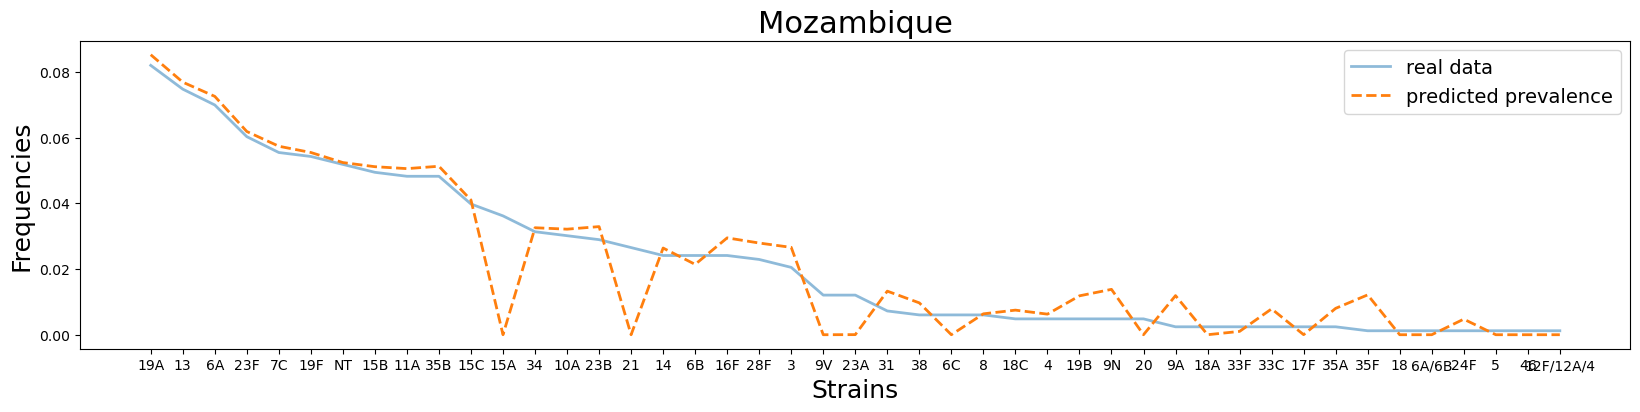

In [11]:
#FINAL TEST by data plot
range_strain = np.linspace(0, strain_number - 1, strain_number)
tick_label = np.array(Mozambique.strain)

fig = plt.figure(figsize = (20, 4))
plt.plot(range_strain, Mozambique_cases, '-', linewidth = 2, alpha =.5, label = 'real data')
plt.plot(range_strain, solution, '--', linewidth = 2, label = 'predicted prevalence')

plt.xlabel('Strains', fontsize = 18)
plt.ylabel('Frequencies', fontsize = 18)

plt.title('Mozambique', fontsize = 22)

plt.xticks(range_strain, labels = tick_label)
plt.legend(fontsize = 14)
plt.show()
#fig.savefig('Mozambique_estimate.png', dpi=300)